# Political Science 3 Lecture J: Bivariate Regression
Professor: Jason Wittenberg  
Authors: Eric Van Dusen, William McEachen

## Agenda
1) **TODO**  
1) Defining a Linear Model  
2) Why OLS?  
3) Formula for OLS  
4) Defining line fitness

In [11]:
import numpy as np
from scipy import stats
# from datascience import Table
import pandas as pd
from ipywidgets import *
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from IPython.display import display, Markdown
%matplotlib inline

## Linear Models:
When we have two continuous variables (one dependent, one independent), we can use *bivariate regression* to determine how closely the two are related. Biviarate regression is used to determine how changes in one variable -- the independent variable, often denoted $X$ -- can predict changes in another, the dependent variable, often denoted $y$. Bivariate regression relies on a linear model, which follows the form $ y= \alpha + \beta X$, where $\alpha$ is the y-intercept and $\beta$ is the slope. 

If we assume that the relationship between our variables is not perfect (or, in the real world, if there is some predictable inaccuracy in our measurement), we add an error term $\epsilon$: $ y= \alpha + \beta X + \epsilon$. 

## Motivating Ordinary Least Squares

To understand how we might create an equation for two variables, let's consider the relationship between GDP growth and incumbent vote share (from Lecture I). Let's load in the data table where the GROWTH column represents GDP growth and the VOTE column represents incumbent vote share.

In [12]:
fair_df = pd.read_csv('data/fair.csv')
fair_df

,YEAR,VOTE,PARTY,PERSON,DURATION,WAR,GROWTH,INFLATION,GOODNEWS
0,1880,50.220,-1,0,1.75,0,3.879,1.974,9
1,1884,49.846,-1,0,2.00,0,1.589,1.055,2
2,1888,50.414,1,1,0.00,0,-5.553,0.604,3
3,1892,48.268,-1,1,0.00,0,2.763,2.274,7
4,1896,47.760,1,0,0.00,0,-10.024,3.410,6
5,1900,53.171,-1,1,0.00,0,-1.425,2.548,7
6,1904,60.006,-1,0,1.00,0,-2.421,1.442,5
7,1908,54.483,-1,0,1.25,0,-6.281,1.879,8
8,1912,54.708,-1,1,1.50,0,4.164,2.172,8
9,1916,51.682,1,1,0.00,0,2.229,4.252,3


Now we can plot these variables:
*Review*: Why is GDP growth our independent variable (represented on the x-axis)?

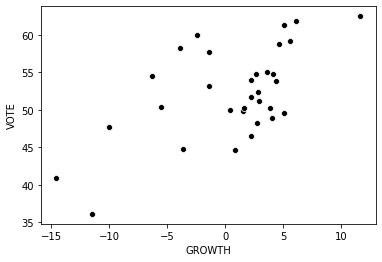

In [13]:
sns.scatterplot('GROWTH', 'VOTE', data=fair_df, color='black')

Above, it appears that as GROWTH increases (as we move further to the right on the x-axis), VOTE also increases. If we wanted to use this data to make future predictions, we could use a linear model to represent the variables' relationship. Below, you can change the slope and intercept of the line to best fit the data:

In [14]:
def draw_line(slope, intercept):
    #The Linear Model
    def f(x):
        return intercept*(slope-1)/30*x +intercept
    x = np.arange(-15,15)
    y_pred = f(x)
    points = (zip(fair_df.GROWTH, fair_df.VOTE))
    #The line
    plt.plot(x,y_pred)
    #The actual data
    sns.scatterplot('GROWTH', 'VOTE', data=fair_df, color='black')
    plt.xlabel('GDP Growth per Capita')
    plt.ylabel('Incumbent Vote Share')
    display(Markdown(rf'$\hat y$= {slope}$X$ + {intercept}:'))
    #Print the loss
    print("Square Residual Sum:", sum([(y-f(x))**2 for x,y in points]))
    print("Absolute Residual Sum:", sum([abs(y-f(x))for x, y in points]))
    
interact(draw_line, slope=(0.0,3), intercept=(30,70))


interactive(children=(FloatSlider(value=1.5, description='slope', max=3.0), IntSlider(value=50, description='i…

<function __main__.draw_line(slope, intercept)>

### What line is best?
When we are evaulating how "good" a line is, we must address the *residuals*, the difference between the real and predicted values of y: $u_i = Y_i - \hat{Y_i}$. Because every real y value has an associated residual, we need some way to aggregate the residuals if we are to measure the overall quality of a line

#### Absolute value
One measurement of loss is calculated by adding the absolute value of the residuals together:
$$\sum_{i=1}^n |u_i| = \sum_{i=1}^n |Y_i - \hat{Y_i}|$$

#### Squared error:
Another measurement is the *squared error*, calculated by adding the squared values of the residuals:
$$\sum_{i=1}^n |u_i^2| = \sum_{i=1}^n (Y_i-\hat{Y_i})^2$$

For either measurement, we want the line that results in the smallest value (indicating that the total difference between the predicted and actual values is small). Below, try to minimize either the absolute or squared loss:

In [15]:
def draw_line(slope, intercept):
    #The Linear Model
    def f(x):
        return intercept*(slope-1)/30*x +intercept
    x = np.arange(-15,15)
    y_pred = f(x)
    display(Markdown(rf'$\hat y$= {slope}$X$ + {intercept}:'))
    #The line
    plt.plot(x,y_pred)
    #The Data
    sns.scatterplot('GROWTH', 'VOTE', data=fair_df, color='black')
    plt.xlabel('GDP Growth per Capita')
    plt.ylabel('Incumbent Vote Share')
    #Print the loss
    print("Square Residual Sum:", sum([(y-f(x))**2 for x,y in zip(fair_df.GROWTH, fair_df.VOTE)]))
    print("Absolute Residual Sum:", sum([abs(y-f(x))for x, y in zip(fair_df.GROWTH, fair_df.VOTE)]))
    
interact(draw_line, slope=(0.0,3), intercept=(30,70))

interactive(children=(FloatSlider(value=1.5, description='slope', max=3.0), IntSlider(value=50, description='i…

<function __main__.draw_line(slope, intercept)>

What's the smallest squared error/absolute error you can produce?

## Ordinary Least Squares
Statisticians prefer to use the line that minimizes the squared residuals. To find the slope ($\beta$) and y-intercept ($\alpha$), the following equations are used:
$$\beta = \frac{\sum_{i=1}^n (X_i - \overline{X})(Y_i - \overline{Y})}{\sum_{i=1}^n (X_i - \overline{X})^2}$$
$$\alpha = \overline{Y}-\beta\overline{X}$$
*Reminder*: $\overline{X}$ represents the mean value of X.

### Using Python:
To calculate the slope and y-intercept for the linear model of X and Y, use <code>stats.linregress(X, Y)</code>. This returns a LinregressResult which holds the slope, intercept, the associated r and p values, and standard error (we'll cover what those mean next). To access the slope and intercept, you can index into the LinregressResult, as shown below:

In [112]:
gdp_vote_result = stats.linregress(fair_df.GROWTH, fair_df.VOTE)
slope = gdp_vote_result[0]
intercept = gdp_vote_result[1]
slope, intercept

(0.6535869126309609, 51.85976616886776)

Now that we have the slope and intercept, we can plot the line of best fit alongside the original data:

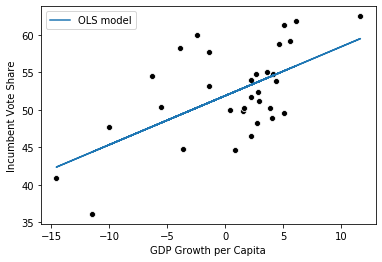

In [113]:
sns.scatterplot('GROWTH', 'VOTE', data=fair_df, color='black')
plt.plot(fair_df.GROWTH, fair_df.GROWTH*slope +intercept, label='OLS model')
plt.xlabel('GDP Growth per Capita')
plt.ylabel('Incumbent Vote Share')
plt.legend()

## Goodness of Fit
Now that we have our linear model, we want to evaulate how well it tracks the relationship between the independent and dependent variables (X and Y). Below, which models are fit well by a linear model?

In [114]:
#A Generic Plotting function for some f(x)
def plot_func(f, label):
    x = np.random.randint(1,25, size=50)
    y = f(x)
    sns.scatterplot(x, y, label=label)
    result = stats.linregress(x, y)
    slope = result[0]
    intercept = result[1]
    plt.plot(x, x * slope + intercept, label='OLS model')
    plt.legend()

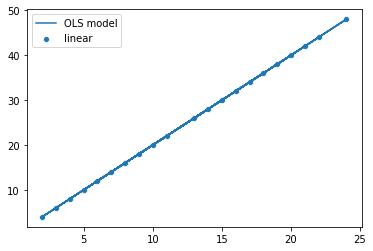

In [115]:
def f(x):
    return 2*x
plot_func(f, 'linear')

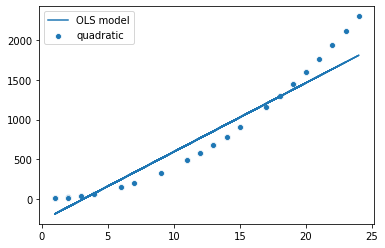

In [116]:
def f(x): 
    return 4*x**2 + np.random.random(50)
plot_func(f, 'quadratic')

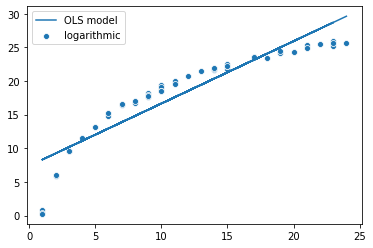

In [117]:
def f(x):
    return  8*np.log(x) + np.random.random(50)
plot_func(f, 'logarithmic')

As we can see, linear models can better represent some relationships than others! We need some measure to quantify if a linear model is appropriate.

## $R^2$  Statistic
In order to determine if our linear model is a good fit, we need to understand how much of the variance in the values of Y can be captured in our model. In the 3 plots above, a linear model had differing abilities to represent that variation.  
*Review*: Which functions variation was best captured by a linear model?  

We need a measurement that compares the overall variation in Y values with the variation that is not represented by our OLS model. This second kind is the *residual variation* because it is the difference between true values of Y and those predicted by our model. The $R^2$ statistic is a value between 0 and 1 that represents the proportion of variation in our Y value that can be accounted for by our model:
$$R^2 = 1-\frac{residual-variation}{total-variation}$$
The residual variation, or Residual Sum of Squares (RSS), is calculated by adding all squared residuals between the predicted and true values of Y:
$$RSS = \sum_{i=1}^n u_i^2 = \sum_{i=1}^n (Y_i - \hat{Y_i})^2$$
The total variation, or Total Sum of Squares (TSS), is calculated by adding the squared differences between each value of Y and the mean value of Y:
$$TSS = \sum_{i=1}^n (Y_i - \overline{Y})^2$$
Therefore, the $R^2$ statistic can be found thus:
$$R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^n (Y_i - \hat{Y_i})^2}{\sum_{i=1}^n (Y_i - \overline{Y})^2}$$

There is another formula for calculating $R^2$ using the Model Sum of Squares (MSS). The Model Sum of Squares is the total squared difference between predicted values of Y and the average value of Y:
$$MSS = \sum_{i=1}^n (\hat{Y_i} - \overline{Y})^2$$
The formula for $R^2$ using MSS is:
$$R^2 = \frac{MSS}{TSS} = \frac{\sum_{i=1}^n (\hat{Y_i}-\overline{Y})^2}{\sum_{i=1}^n (Y_i - \overline{Y})^2}$$

### Using Python
There are 2 ways to calculate the $R^2$ value using Python. We will show both and demonstrate that they return the same result:  
1) Write functions calculating the RSS and TSS, and then use those to calculate the $R^2$ statistic (we have done this below  
2) Run <code>stats.linregres(X, Y)</code> and square the third value that it returns

In [118]:
#Method 1:
def rss(y, y_pred):
    """Return the Residual Sum of Squares between y and y_pred, the predicted values of y"""
    return sum((y - y_pred)**2)
def tss(y):
    """Return the Total Sum of Squares for y"""
    avg = np.mean(y)
    return sum((y - avg)**2)

def mss(y, y_pred):
    """Return the Model Sum of Squares for y and y_pred, the predicted values of y"""
    avg = np.mean(y)
    return sum((y_pred-avg)**2)

def r2(y, y_pred):
    """Return the R-squared statistic for y and the predicted values of y"""
    return 1 - (rss(y, y_pred) / tss(y))

predicted_y = fair_df.GROWTH*slope + intercept
r2(fair_df.VOTE, predicted_y)

0.355538632976763

In [119]:
#Method 2:
gdp_vote_result[2]**2

0.355538632976763

As we can see, the two results are the same! Why would this be the case?  

Looking back to Lecture I, we recall that the correlation coefficient, r, is a function of the mutual variation for X and Y. While we can prove more rigorously that Pearson's r is the square root of $R^2$, that is outside the scope of this notebook. For a formal proof, follow [this link](https://economictheoryblog.com/2014/11/05/proof/).

LinregressResult(slope=1.4748288253989605, intercept=0.4341820116425482, rvalue=0.831973661533641, pvalue=0.0028321849214686073, stderr=0.3477245394696419)

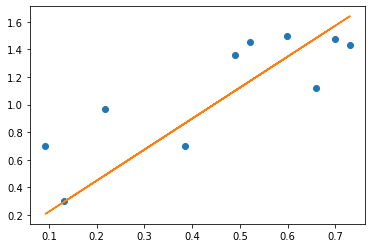

In [18]:
x = np.random.random(10)
y = 1.6*x + np.random.random(10)
plt.plot(x,y, 'o', label='original data')
results = sm.OLS(y, x).fit().predict(x)
plt.plot(x, results)
stats.linregress(x, y)

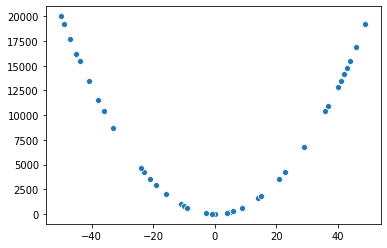

In [41]:
x = np.random.randint(-50,50, size=50)
y = 8*x**2 +np.random.random(50)
sns.scatterplot(x,y)

In [ ]:
# sm.OLS('VOTE ~ GROWTH', data=fair_df).fit().summary()
sm.OLS(fair_df.VOTE,fair_df.GROWTH).fit().summary()